<font color='red'> Sprint 4 Project

<font color='red'>the plan for this project
1. create streamlit with render, add a streamlit configuration file to git repository at .streamlit/config.toml
    
2. create account on render.com and create a new web service
3. Create a new web service linked to Github repository
4. Configure the new Render web service. at Build Command, add pip install streamlit & pip install -r requirements.txt
add Start Command, add: streamlit run app.py
5. Deploy to Render,
6. Verify application is accessible at the following URL: https://sprint4-1kgb.onrender.com/
    <font color='red'>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns

df = pd.read_csv('/Users/hannysetiawan/Downloads/vehicles_us.csv', sep=',')

<font color='red'> display table

In [24]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [25]:
df.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
price,51525,12132,10040,1,5000,9000,16839,375000
model_year,47906,2009,6,1908,2006,2011,2014,2019
cylinders,46265,6,1,3,4,6,8,12
odometer,43633,115553,65094,0,70000,113000,155000,990000
is_4wd,25572,1,0,1,1,1,1,1
days_listed,51525,39,28,0,19,33,53,271


In [26]:
df.duplicated().sum()

0

<font color='red'>no duplicate found

In [27]:
len(df[df.isnull().any(axis=1)])/len(df)

0.7117515769044154

<font color='red'>70% of rows has at least one missing value

In [28]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<font color='red'> found missing value at column model_year, cylinders, odometer, paint_color, is_4wd

In [29]:
model_year_median = df['model_year'].median()
model_year_median

2011.0

In [30]:
df['model_year'].fillna(model_year_median, inplace=True)

<font color='red'> found missing value at column model_year and fill with median of model year

In [31]:
df['model_year'] = df['model_year'].astype(int)

<font color='red'> model_year value convert to interger

In [32]:
cylinder_median = df['cylinders'].median()

In [33]:
df['cylinders'].fillna(cylinder_median, inplace=True)

<font color='red'> found missing value at column model_year and fill with median of cylinders

In [34]:
df['cylinders'] = df['cylinders'].astype(int)

<font color='red'>cylinders value convert to interger

In [35]:
odometer_median = df.groupby('model_year')['odometer'].median()
odometer_median

model_year
1908    169328.0
1929         NaN
1936     30000.0
1948      4000.0
1949      1800.0
          ...   
2015     78514.0
2016     54000.0
2017     41000.0
2018     20627.0
2019     14151.5
Name: odometer, Length: 68, dtype: float64

In [50]:
df['odometer'] = df.apply(lambda row: odometer_median[row['model_year']] if pd.isna(row['odometer']) else row['odometer'], axis=1)
df['odometer'].head()

0    145000.0
1     88705.0
2    110000.0
3    161397.0
4     80903.0
Name: odometer, dtype: float64

In [42]:
odometer_mean = df.groupby('model_year')['odometer'].mean()
odometer_mean

model_year
1908    169328.000000
1929              NaN
1936     30000.000000
1948      4000.000000
1949      1800.000000
            ...      
2015     81884.923262
2016     60349.310596
2017     46530.454733
2018     24521.615139
2019     16676.505263
Name: odometer, Length: 68, dtype: float64

In [48]:
df['odometer'].fillna(odometer_mean, inplace=True)

In [51]:
df['odometer'] = df.apply(lambda row: odometer_mean[row['model_year']] if pd.isna(row['odometer']) else row['odometer'], axis=1)
df['odometer'].head()

0    145000.0
1     88705.0
2    110000.0
3    161397.0
4     80903.0
Name: odometer, dtype: float64

In [59]:
cylinders_mean = df.groupby('model_year')['cylinders'].mean()
cylinders_mean

model_year
1908    8.000000
1929    8.000000
1936    6.000000
1948    8.000000
1949    6.000000
          ...   
2015    5.988865
2016    6.005755
2017    5.903679
2018    6.172367
2019    6.268421
Name: cylinders, Length: 68, dtype: float64

In [60]:
df['cylinders'] = df.apply(lambda row: cylinders_mean[row['model_year']] if pd.isna(row['cylinders']) else row['cylinders'], axis=1)
df['cylinders'].head()

0    6
1    6
2    4
3    8
4    4
Name: cylinders, dtype: int64

In [62]:
cylinders_median = df.groupby('model_year')['cylinders'].median()
cylinders_median

model_year
1908    8.0
1929    8.0
1936    6.0
1948    8.0
1949    6.0
       ... 
2015    6.0
2016    6.0
2017    6.0
2018    6.0
2019    6.0
Name: cylinders, Length: 68, dtype: float64

In [64]:
df['cylinders'] = df.apply(lambda row: cylinders_median[row['model_year']] if pd.isna(row['cylinders']) else row['cylinders'], axis=1)
df['cylinders'].head()

0    6
1    6
2    4
3    8
4    4
Name: cylinders, dtype: int64

In [65]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,no info,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,no info,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


<font color='red'>fill odometer by real number based on the median of each year

In [53]:
df['paint_color'].fillna('no info', inplace=True)

<font color='red'>fill paint_color with no info

In [54]:
df['is_4wd'].fillna(0, inplace=True)

<font color='red'>fill is_4wd by 0

In [55]:
df['is_4wd'] = df['is_4wd'].astype(int)

<font color='red'>type to interger

In [56]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<font color='red'>no missing value found

In [57]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,no info,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,no info,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
6,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73
7,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68
8,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,no info,1,2018-07-16,19
9,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17


<font color='red'>display table all with int

NameError: name 'v_nan' is not defined

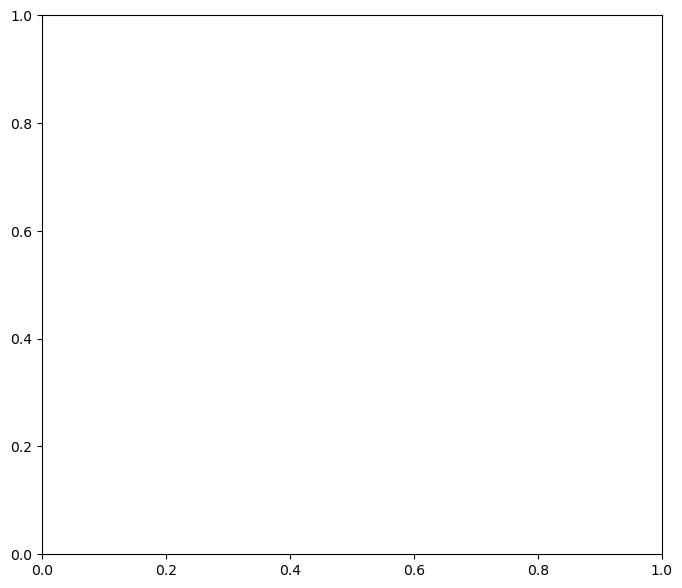

In [22]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(v_nan, x="model", 
                  hue="condition")

<font color='red'>visualization histogram

In [ ]:
v_nan.plot(kind = 'scatter', 
                          title = 'vehicles',
                          x = 'model_year',
                          y = 'price',
                          xlabel = 'model_year',
                          ylabel = 'price'
                          )
plt.style.use('dark_background')
plt.show()

<font color='red'>visualization scatter

<font color='blue'> conclusions 
    * creating and managing python virtual environments, developing a web application, and deploying it to a cloud service and make it accessible to the public
    * the target to achieve web app accessible via a browser, and can be visualize more easier with check box the graph